<a href="https://colab.research.google.com/github/Lovejeet-Singh-31/Retail-Sales-Prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

#**Following are the 7 major steps of building Machine Learning Model** :
#1.   Collecting Data.
#2.   Preparing the Data
*   Exploratory Data Analysis.
*   feature engineering.


#3.   Choosing a Model
#4.   Training the Model.
#5.   Evaluating the Model.
#6.   Parameter Tuning.
#7.   Making Predictions.

#First thing first importing the necessary libraries for EDA and Machine learning algorithim to train our model. 
##Following are the libraries:-

1.   NumPy
2.   Pandas
3.   Matplotlib
4.   Seaborn
5.   Scikit Learn




In [45]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pylab
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss
import math
from sklearn.ensemble import RandomForestRegressor
!pip install scikit-optimize
from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV
from sklearn import ensemble


from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Now we are ready to mount the google drive using following code

In [2]:
#Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**1.Collecting Data.**

#After mounting the gdrive we are ready to load our dataset.
we have two dataset.which is Rossmann Store data and Store data.In which we have diffrent store observations and its some information like sales store catagories etc.


In [3]:
#loading our Two Datasets
rossmann_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Retail Sales Prediction - Lovejeet Singh/Dataset/Copy of Rossmann Stores Data.csv')
store_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Retail Sales Prediction - Lovejeet Singh/Dataset/Copy of store.csv')

#**2.Preparing the Data**

##Now checking the shape of our DataFrames which helps to get an idea to know the number of rows and columns present in our both DataFrames.

In [4]:
#Checking the Number of rows and columns using Shape methods
rossmann_df.shape, store_df.shape

((1017209, 9), (1115, 10))

##The Rossmann_df has 1017209 number of rows and 9 columns.
##The Store_df has 1115 number of rows and 10 column. 

#Using info() method we can easily get the idea of what kind of data type and null values inside our both dataframes we have.

In [5]:
#checking the info 
rossmann_df.info(), store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assort

(None, None)

#as we can see that in our rossmann_df we have zero null values and in our Store_df we have too many null values.

##geting the total sum of null values present in each columns in our Store_df using isnull() function present in pandas library. 

In [6]:
#calculating totall null values in our store dataframe
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

##we can see that we have 6 columns in which we have null values. so we have to find correct way to fll these null values.

#Remove features with high percentages of missing values

In [7]:
# remove features
store_df = store_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

##Firstly we looking to treat null values in cometiondistance column by checking its distribution.

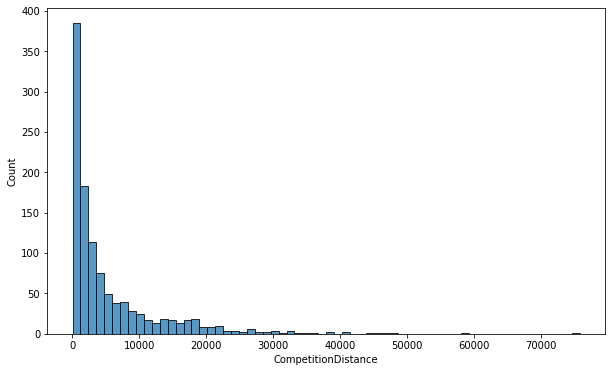

In [46]:
#checking the disribution of CompetitionDistance column
plt.figure(figsize=(10,6))
sns.histplot(store_df['CompetitionDistance'])
plt.show()

#as we can see that the distribution look like right skewed distribution. so we dicided to fill null values with median 

In [9]:
#replacing Nan values in CompetitionDistance with median.
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

#Now checking the Null values

In [10]:
## Now checking Nan values
store_df.isna().sum()

Store                  0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

##Now we can see the numeric value and its aggregations like mean,mode,max and median using Describe method

In [11]:
#checking the mean mode and median in rossman_df dataset using describe function
rossmann_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [12]:
#checking the mean mode and median in store_df dataset using describe function
store_df.describe()

,Store,CompetitionDistance,Promo2
count,1115.00000,1115.000000,1115.000000
mean,558.00000,5396.614350,0.512108
std,322.01708,7654.513635,0.500078
min,1.00000,20.000000,0.000000
25%,279.50000,720.000000,0.000000
50%,558.00000,2325.000000,1.000000
75%,836.50000,6875.000000,1.000000
max,1115.00000,75860.000000,1.000000


##Using head function we can get an glimps of our both dataset. 

In [13]:
#using head() function we able to view top 5 rows 
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [14]:
#using head() function we able to view top 5 rows 
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,Promo2
0,1,c,a,1270.0,0
1,2,a,a,570.0,1
2,3,a,a,14130.0,1
3,4,c,c,620.0,0
4,5,a,a,29910.0,0


#Merge the Rossmann_df and Store_df by column 'Store' as in both csv Store column is common.

In [15]:
#mearging the two dataset using pd.merge funtion.
merge_rossman_store_df = pd.merge(rossmann_df, store_df, on='Store', how='left')
merge_rossman_store_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,0


In [16]:
#checking the shape
merge_rossman_store_df.shape

(1017209, 13)

#Now we have 1017209 numner of rows and 18 columns.

In [17]:
#checking the info/ datatype in our merged dataframe
merge_rossman_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   DayOfWeek            1017209 non-null  int64  
 2   Date                 1017209 non-null  object 
 3   Sales                1017209 non-null  int64  
 4   Customers            1017209 non-null  int64  
 5   Open                 1017209 non-null  int64  
 6   Promo                1017209 non-null  int64  
 7   StateHoliday         1017209 non-null  object 
 8   SchoolHoliday        1017209 non-null  int64  
 9   StoreType            1017209 non-null  object 
 10  Assortment           1017209 non-null  object 
 11  CompetitionDistance  1017209 non-null  float64
 12  Promo2               1017209 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 108.6+ MB


#As we can see that many columns our in object datatype so we have to check the datatype of thses column because our machine learning algorithms only takes numberical values.

# first we have date column we have to separate the date, month and year from that.

In [18]:
#creating new variable date month and year from Date column 
merge_rossman_store_df['year'] = merge_rossman_store_df['Date'].apply(lambda x: x.split('-')[0])
merge_rossman_store_df['month'] = merge_rossman_store_df['Date'].apply(lambda x: x.split('-')[1])
merge_rossman_store_df['date'] = merge_rossman_store_df['Date'].apply(lambda x: x.split('-')[2])

In [19]:
merge_rossman_store_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,year,month,date
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0,2015,07,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1,2015,07,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1,2015,07,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,0,2015,07,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,0,2015,07,31


#So as we have catagorical values in StateHoliday so we can use pd.getdummies to create dummies variable. 

In [20]:
#calculation value counts using value_counts() funtion
merge_rossman_store_df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [21]:
merge_rossman_store_df.loc[merge_rossman_store_df['StateHoliday'] == '0', 'StateHoliday'] = 0

In [22]:
merge_rossman_store_df['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [23]:
# One hot encoding
merge_rossman_store_df = pd.get_dummies(merge_rossman_store_df, columns=["StateHoliday"],drop_first=True)

In [24]:
merge_rossman_store_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,year,month,date,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,1,c,a,1270.0,0,2015,07,31,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,a,a,570.0,1,2015,07,31,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,a,a,14130.0,1,2015,07,31,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,c,c,620.0,0,2015,07,31,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,a,a,29910.0,0,2015,07,31,0,0,0


In [25]:
merge_rossman_store_df['StateHoliday_a'].value_counts()

0    996949
1     20260
Name: StateHoliday_a, dtype: int64

#Now in Assortment column we have to levelized the catagorical value in a form of 0,1,2 which we give some weightage to model predictions.

In [26]:
merge_rossman_store_df['Assortment'].value_counts()

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64

In [27]:
# code for changing Assortment dtype from object to int.
merge_rossman_store_df['Assortment'] = np.where((merge_rossman_store_df['Assortment'] == 'a'),0,merge_rossman_store_df['Assortment'])
merge_rossman_store_df['Assortment'] = np.where((merge_rossman_store_df['Assortment'] == 'b'),1,merge_rossman_store_df['Assortment'])
merge_rossman_store_df['Assortment'] = np.where((merge_rossman_store_df['Assortment'] == 'c'),2,merge_rossman_store_df['Assortment'])

#Now in StoreType we did not use One hot encoding because if we done hone encoding which give equal weightage to our model. so as per domain knowledge we can labeled as 0,1,2,3 as store type.


*   store_type 0 means small store_type.
*   store_type 1 means medium store_type.

*   store_type 2 means large store_type.
*   store_type 3 means huge store_type.





In [28]:
merge_rossman_store_df['StoreType'].value_counts()

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

In [29]:
#converting catagorical value into interger values based on store type class.
merge_rossman_store_df['StoreType'] = np.where((merge_rossman_store_df['StoreType'] == 'a'),0,merge_rossman_store_df['StoreType'])
merge_rossman_store_df['StoreType'] = np.where((merge_rossman_store_df['StoreType'] == 'b'),1,merge_rossman_store_df['StoreType'])
merge_rossman_store_df['StoreType'] = np.where((merge_rossman_store_df['StoreType'] == 'c'),2,merge_rossman_store_df['StoreType'])
merge_rossman_store_df['StoreType'] = np.where((merge_rossman_store_df['StoreType'] == 'd'),3,merge_rossman_store_df['StoreType'])

In [30]:
merge_rossman_store_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,year,month,date,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,1,2,0,1270.0,0,2015,07,31,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,0,0,570.0,1,2015,07,31,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,0,0,14130.0,1,2015,07,31,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,2,2,620.0,0,2015,07,31,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,0,0,29910.0,0,2015,07,31,0,0,0


Some of the columns now showing when we use head().

In [31]:
pd.set_option('display.max_columns', None)

In [32]:
merge_rossman_store_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,year,month,date,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,1,2,0,1270.0,0,2015,07,31,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,0,0,570.0,1,2015,07,31,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,0,0,14130.0,1,2015,07,31,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,2,2,620.0,0,2015,07,31,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,0,0,29910.0,0,2015,07,31,0,0,0


#lets check the info of our dataframe.

In [33]:
merge_rossman_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   DayOfWeek            1017209 non-null  int64  
 2   Date                 1017209 non-null  object 
 3   Sales                1017209 non-null  int64  
 4   Customers            1017209 non-null  int64  
 5   Open                 1017209 non-null  int64  
 6   Promo                1017209 non-null  int64  
 7   SchoolHoliday        1017209 non-null  int64  
 8   StoreType            1017209 non-null  object 
 9   Assortment           1017209 non-null  object 
 10  CompetitionDistance  1017209 non-null  float64
 11  Promo2               1017209 non-null  int64  
 12  year                 1017209 non-null  object 
 13  month                1017209 non-null  object 
 14  date                 1017209 non-null  object 
 15

#As we can see that some of our features are in object datatype so we have to first convert into interger or float. so that our machine learning algorithm will understand these feature.

In [34]:
#converting object dtype to integer.
merge_rossman_store_df['year']= merge_rossman_store_df['year'].astype(int)
merge_rossman_store_df['month']= merge_rossman_store_df['month'].astype(int)
merge_rossman_store_df['date']= merge_rossman_store_df['date'].astype(int)
merge_rossman_store_df['StoreType']= merge_rossman_store_df['StoreType'].astype(int)
merge_rossman_store_df['Assortment']= merge_rossman_store_df['Assortment'].astype(int)

##making a copy of our processed dataset to prevent that if we mistakenly do some change via code like inplace = true .

In [35]:
final_df = merge_rossman_store_df.copy()

#Checking the Duplicate Values in our final dataset.

In [36]:
# Checking Duplicate Values
value=len(final_df[final_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


#**Exploratory Data Analysis**

In [37]:
#checking the first 5 rows of our dataframe
final_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,year,month,date,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,1,2,0,1270.0,0,2015,7,31,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,0,0,570.0,1,2015,7,31,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,0,0,14130.0,1,2015,7,31,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,2,2,620.0,0,2015,7,31,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,0,0,29910.0,0,2015,7,31,0,0,0


#Our Target variable is Sales so we have to check the distrubution.

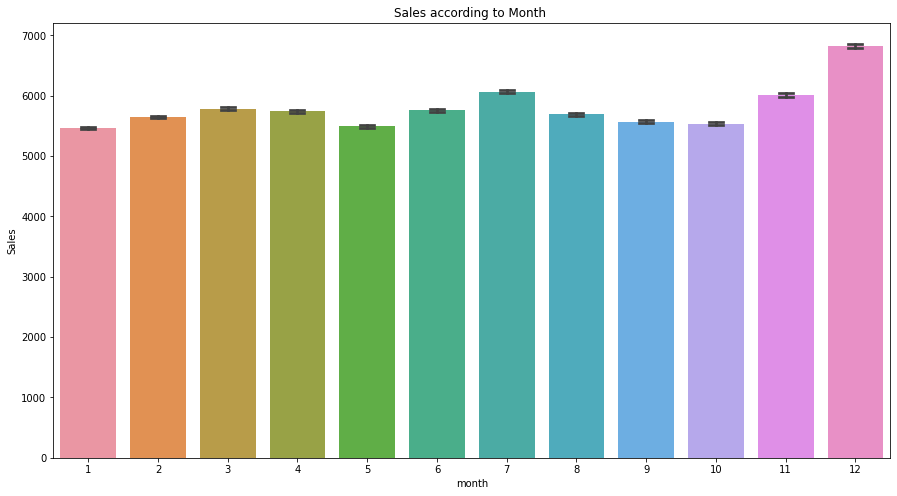

In [47]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=final_df,x='month',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to Month ')
plt.show()

#In the above chart The sales in the month of December is high beacuse of winter holidays and Christmas festival and also new year so. Lots of stores start many offers on some products so people will more buy discounted items.

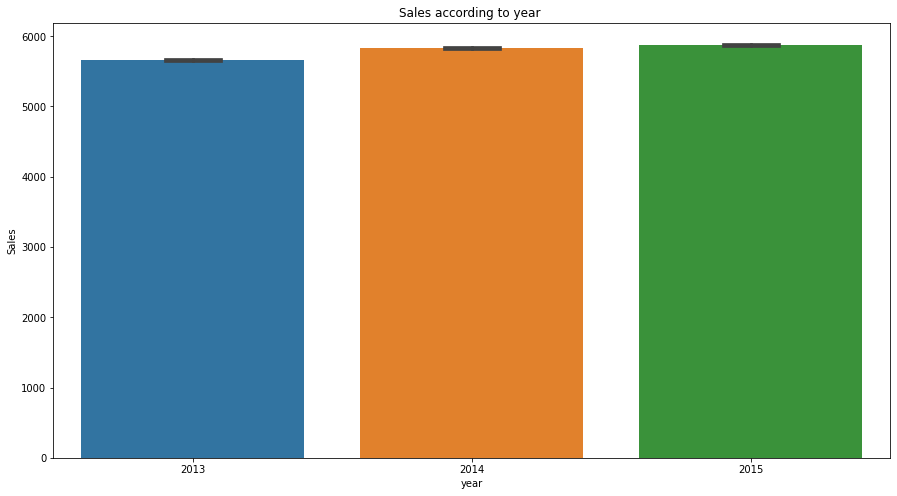

In [48]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=final_df,x='year',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to year ')
plt.show()

#In this chart of sales according to years shows that in 2014 and 2015 have almost same sales through out the year but in 2013 there is slightly low sales. 

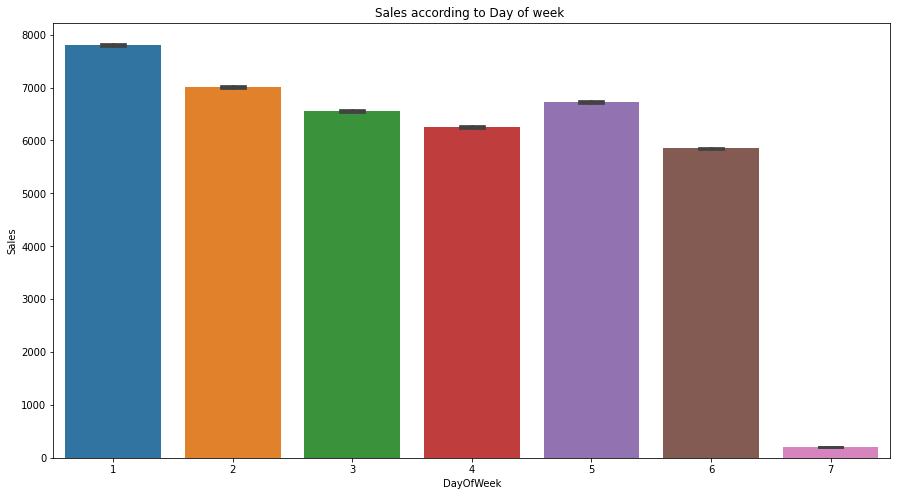

In [49]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=final_df,x='DayOfWeek',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to Day of week ')
plt.show()

#In the above chart The sales in the 7th day of the week having very low sales may be on sunday there were very less amount of stores open. 

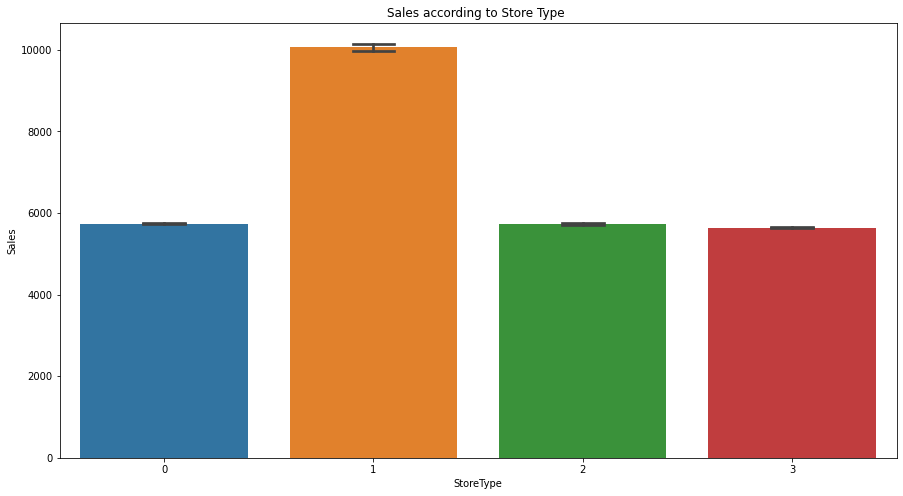

In [52]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=final_df,x='StoreType',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to Store Type ')
plt.show()

#In the above chart The sales in the store type 1 have higher sales as compare to other store catagory. the rest of store having almost same sales.

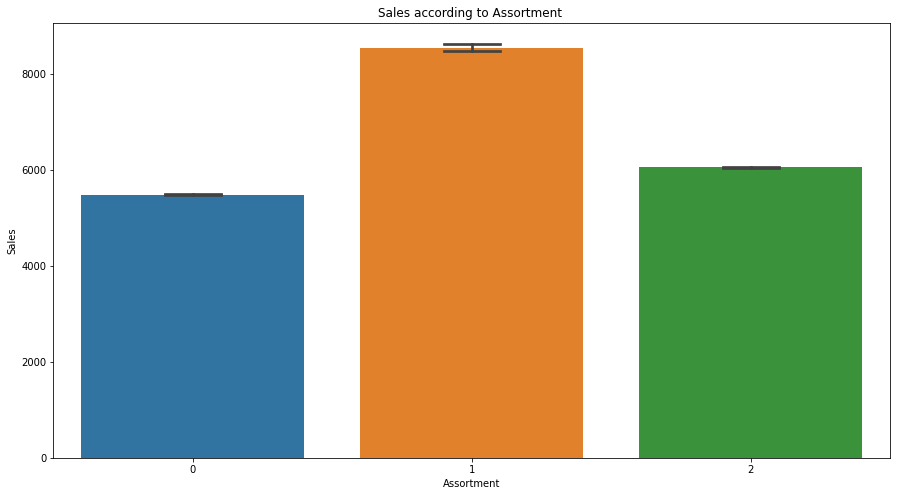

In [53]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=final_df,x='Assortment',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to Assortment ')
plt.show()

In the above chart The sales in which product assortment type 1 have higher sales as compare to other assortment catagory. the rest of assortment having almost same sales.

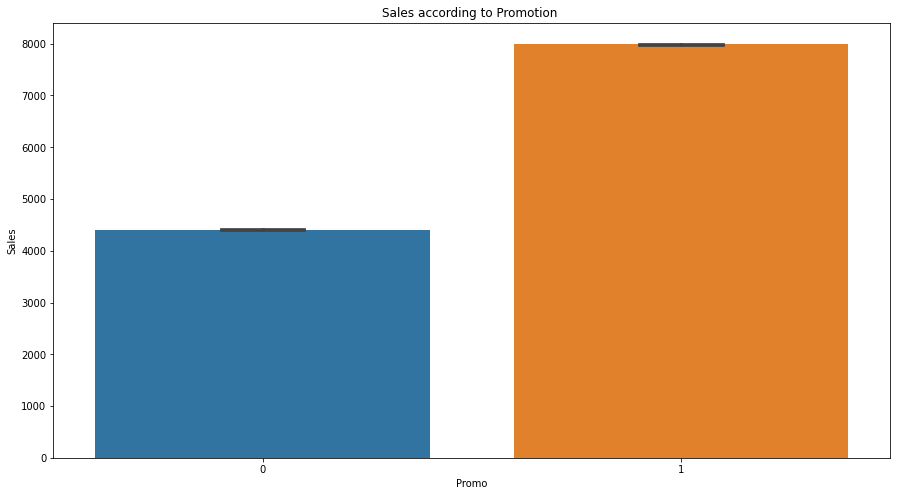

In [55]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=final_df,x='Promo',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to Promotion ')
plt.show()

#As we can see that the store who participating in promotion having more sales as compare to other. which means promotion is the key to attract the customer towards the store.

#As we can see that our target variable 'Sales' look like normal distribution. 

#Now check the distribution of our each features

In [56]:
numeric_features = list(final_df.describe().columns)
numeric_features

['Store',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'Promo2',
 'year',
 'month',
 'date',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c']

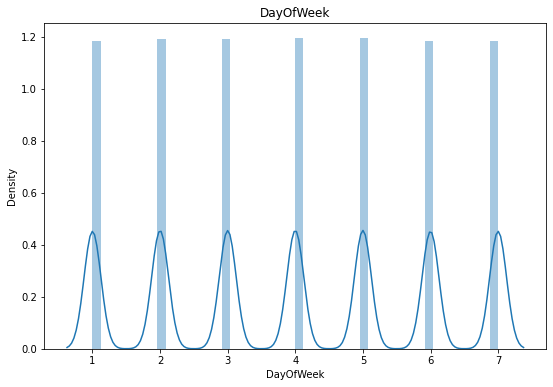

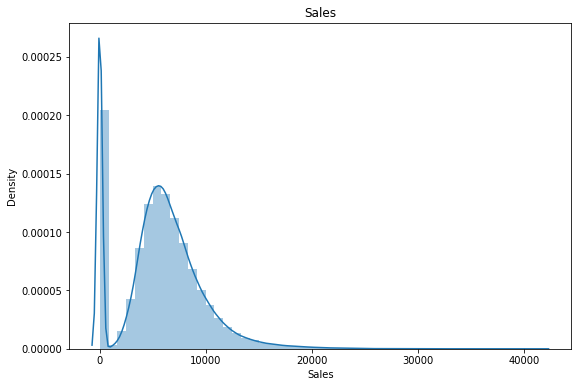

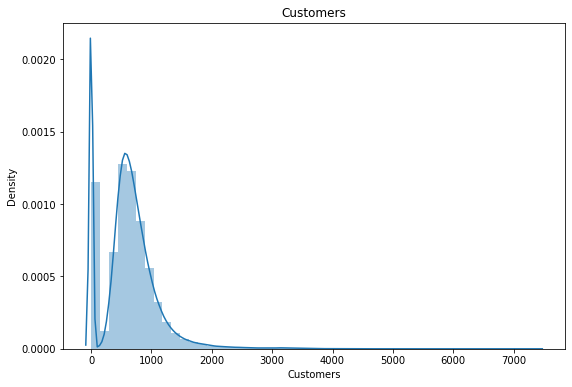

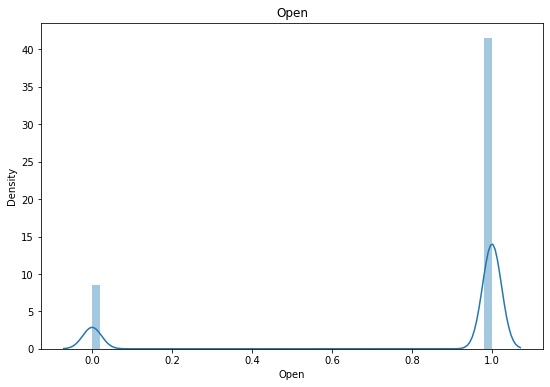

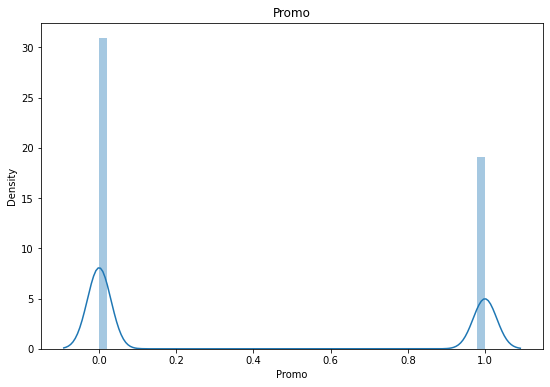

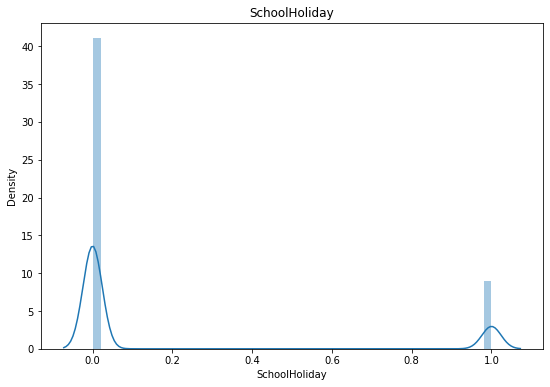

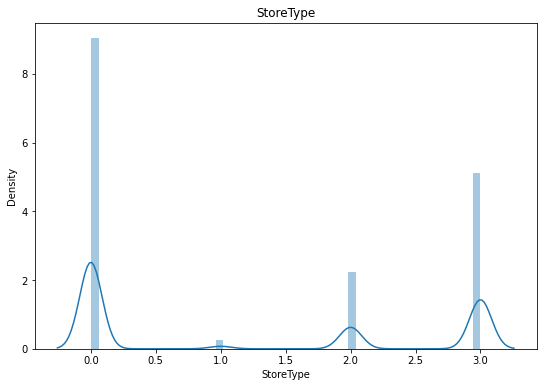

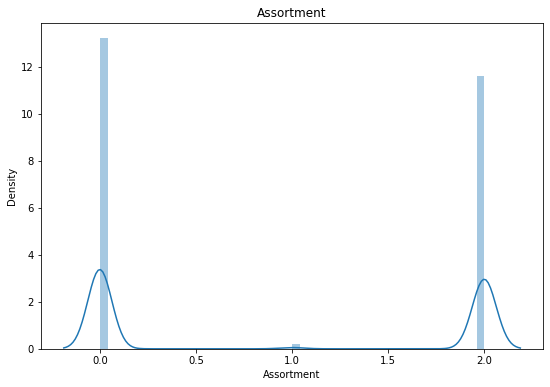

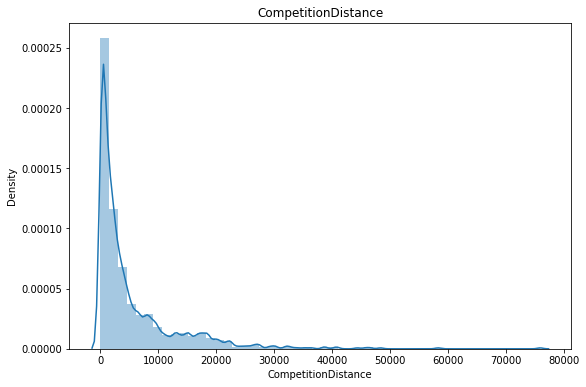

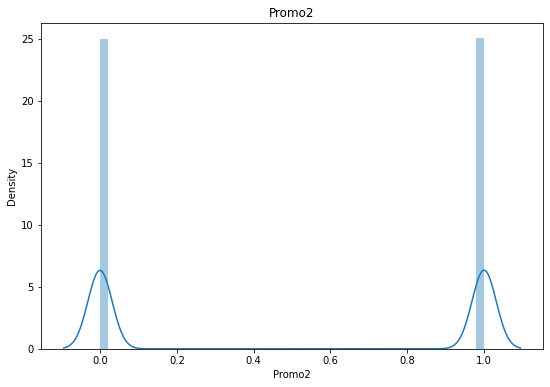

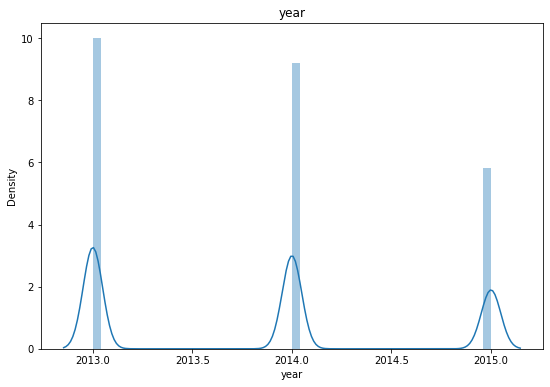

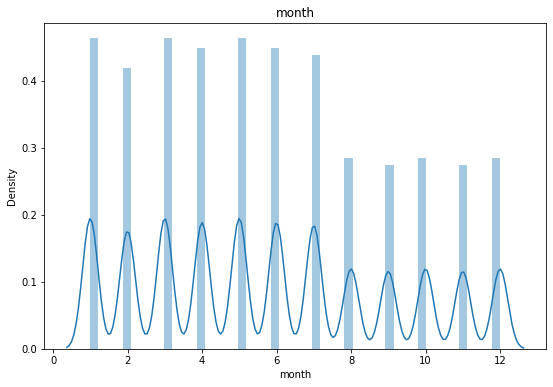

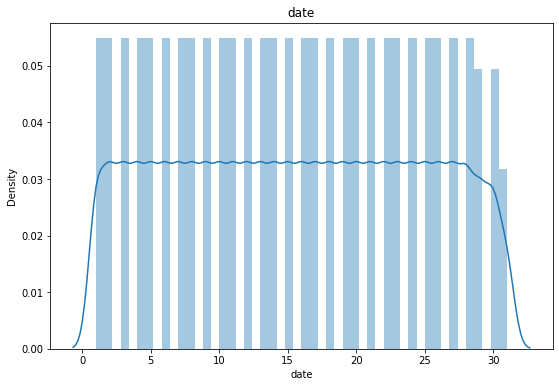

In [57]:
#printing displots to analyze the distribution of all numerical features
# plot a bar plot for each numerical feature count (except store)

for col in numeric_features[1:-3]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = final_df[col]
    sns.distplot(feature,ax = ax)    
    ax.set_title(col)
plt.show()

#In the above charts we see that many features has catogorical value so its more look like skewed chart and rest of the feature also not normaly distributed. So by using log1p transformation we are able to make our distribution more closer to look like normal distribution.


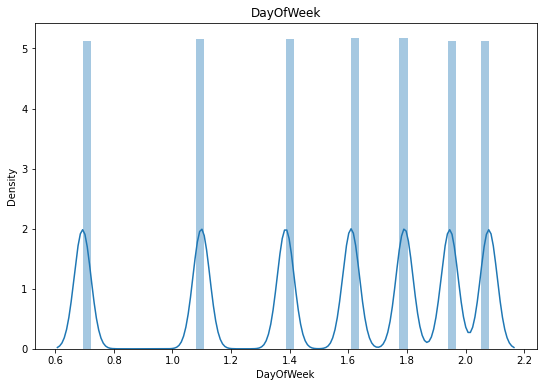

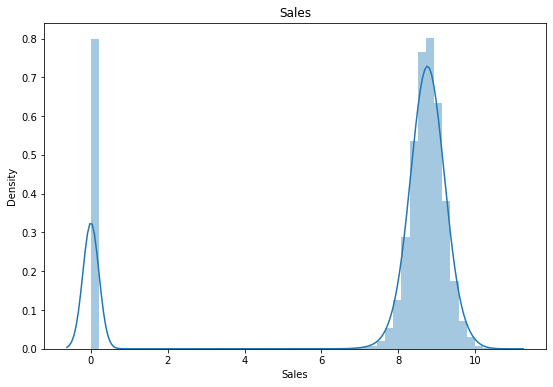

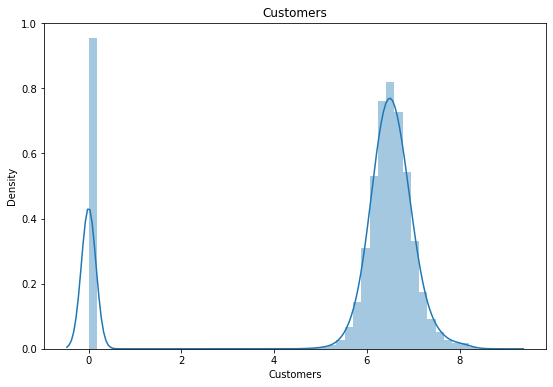

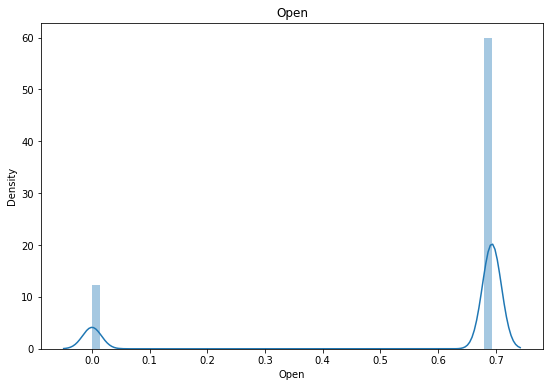

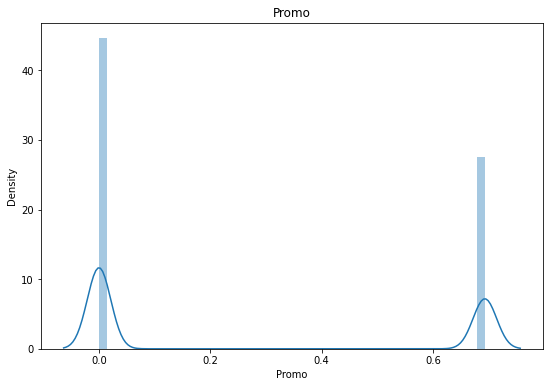

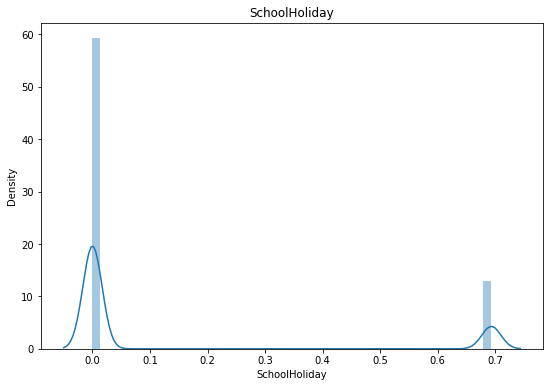

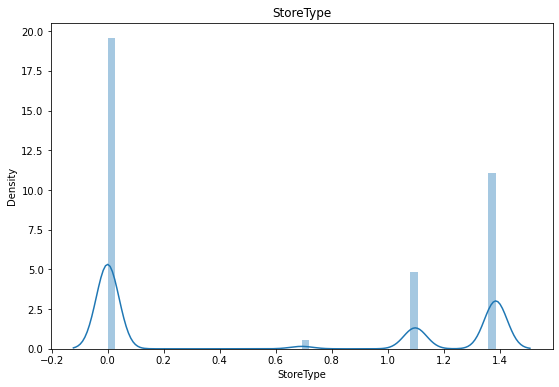

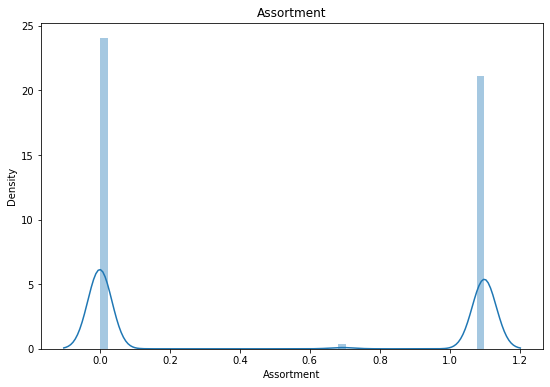

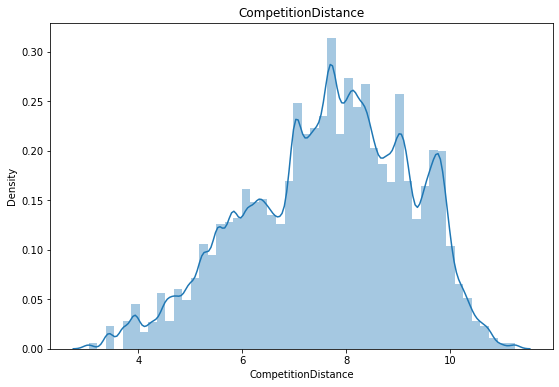

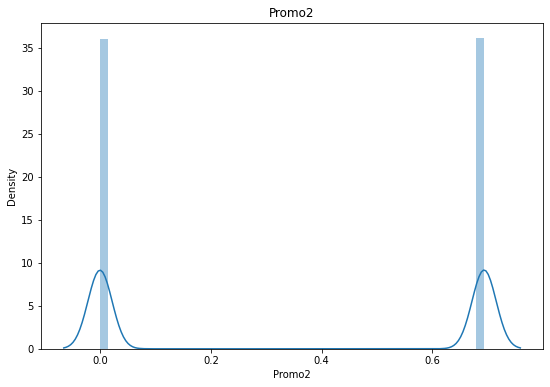

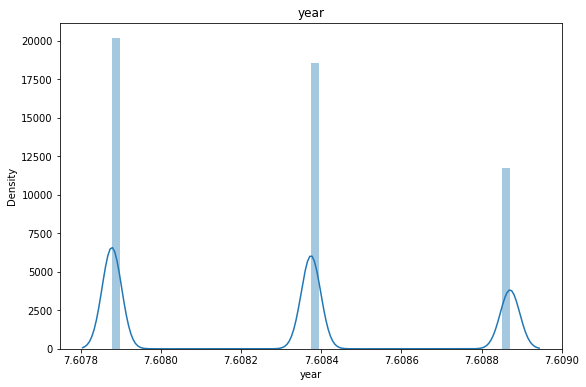

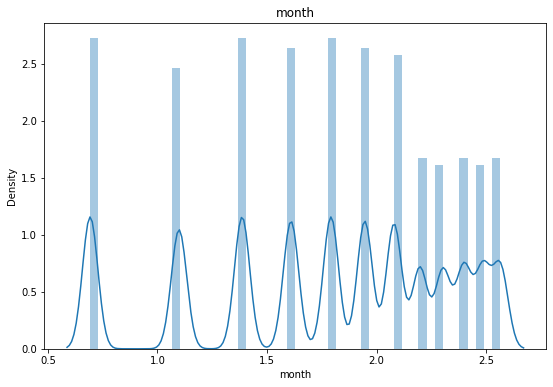

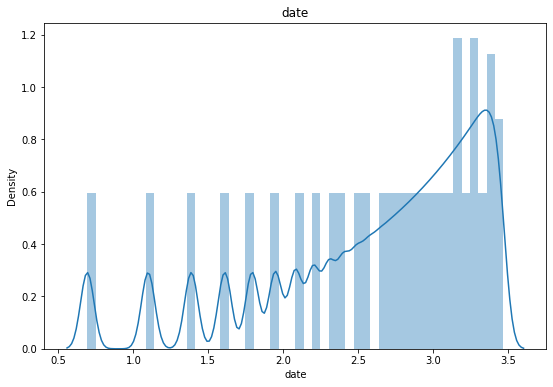

In [58]:
#printing displots to analyze the distribution of all numerical features
# plot a bar plot for each numerical feature count (except store) with  log1p tranformation.

for col in numeric_features[1:-3]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log1p(final_df[col])
    sns.distplot(feature)    
    ax.set_title(col)    
    
plt.show()

#now we can see that some of our features like CompititionDistance now more look like normal distribution. rest of our feature still not normaly distributed some of feature has multi mode. beacuse of some features have catagorical values like 1,0.

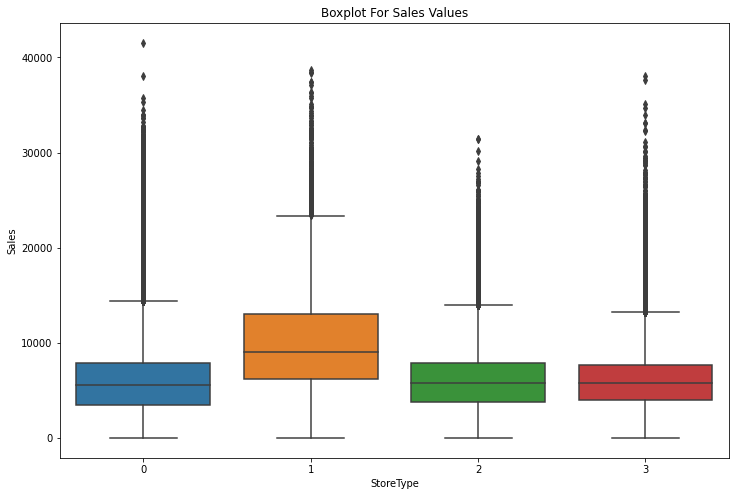

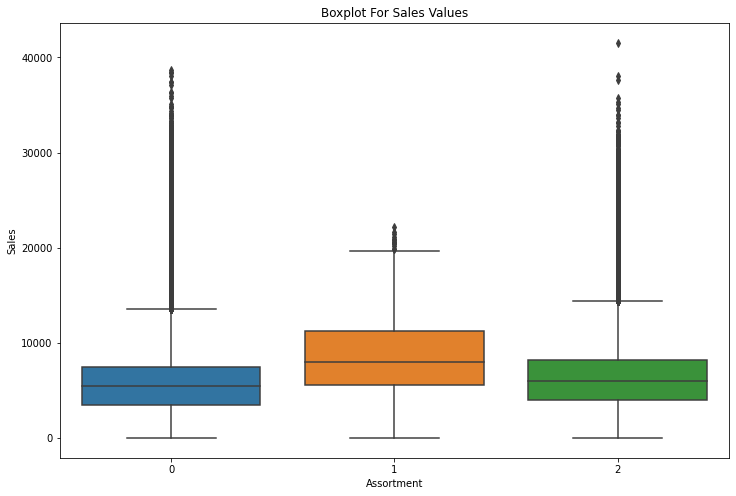

In [60]:
for col in ['StoreType','Assortment']:
  plt.figure(figsize=(12, 8))
  plot_storetype_sales = sns.boxplot(x=col, y="Sales", data=final_df)
  plt.title('Boxplot For Sales Values')
plt.show()

#In this above boxplot we see too many outliers. if we look at the data and apply some domain knowledge . we easily understand that these values are not outliers.
#For Example :-
#if a store start giving discount on some products which means number of sales increase due to some discount. so when we compline our data and plot and box plot on a yearly based data so some of our value shown as outliers.beacuse in some month or an specific occasions store giving some discount.  

#Feature Engineering

#Checking the correlation of each feature with our dependend feature 'Sales'

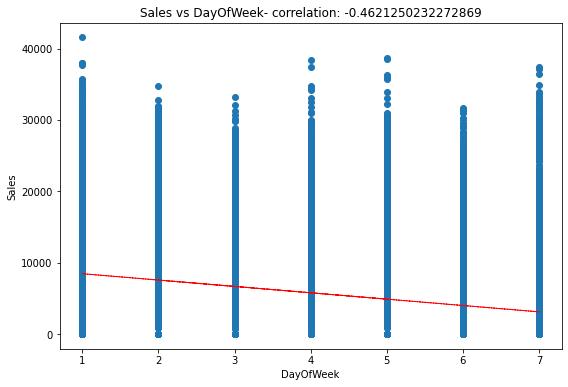

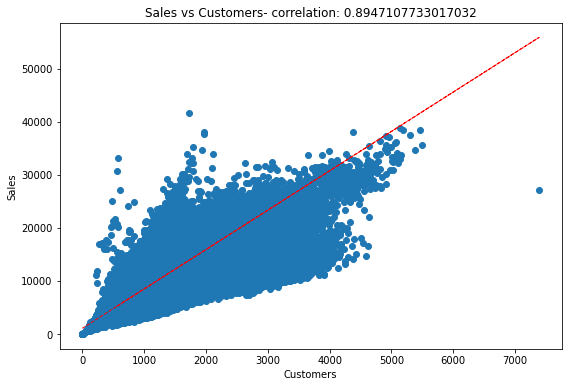

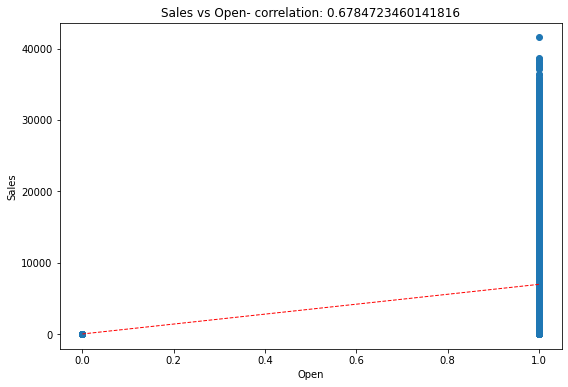

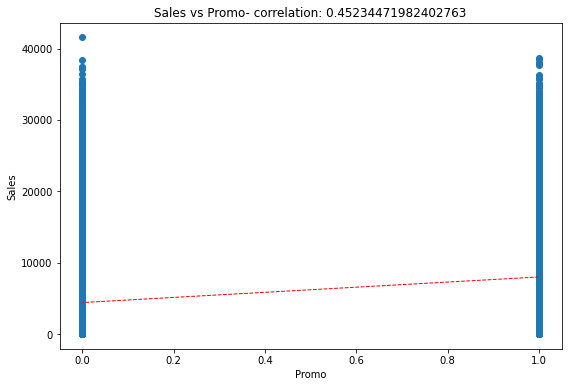

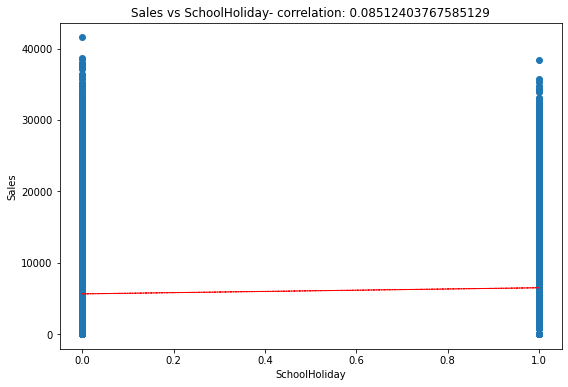

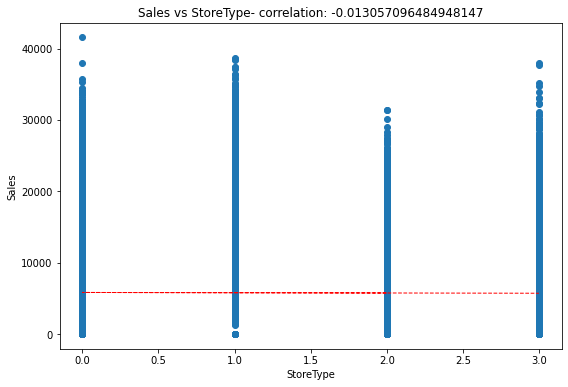

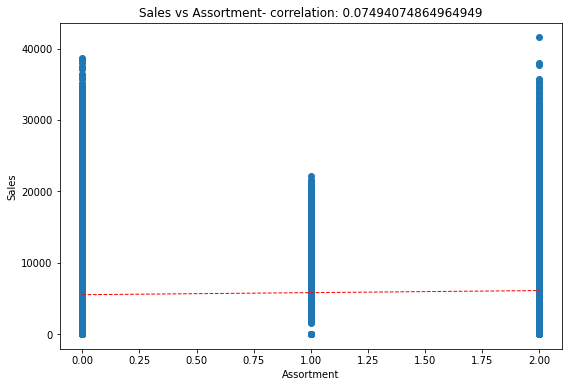

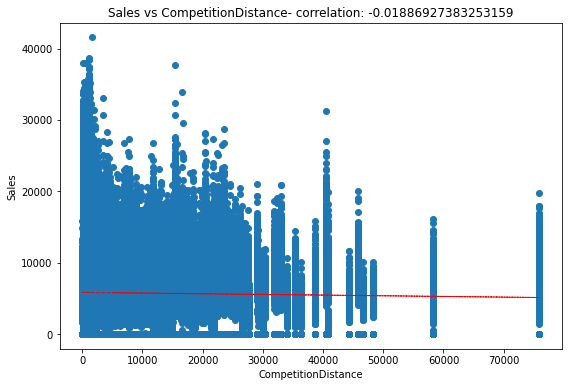

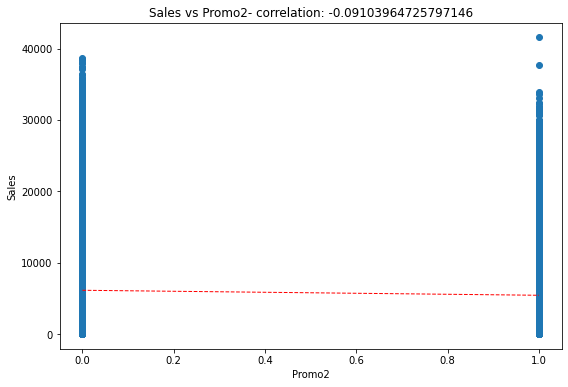

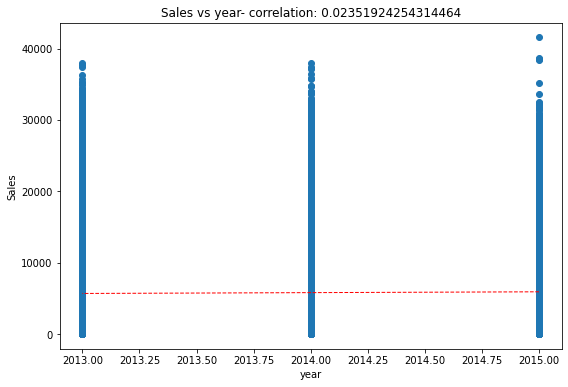

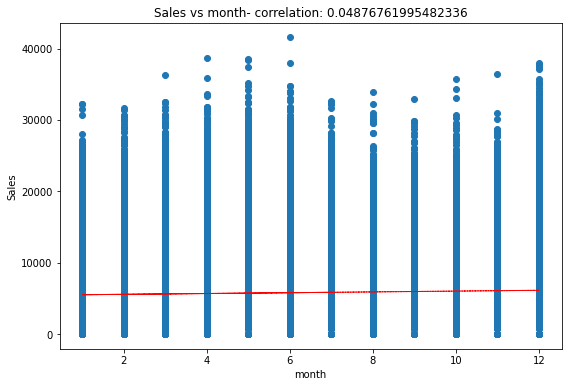

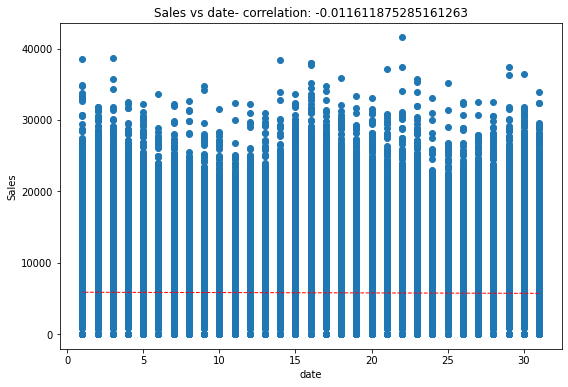

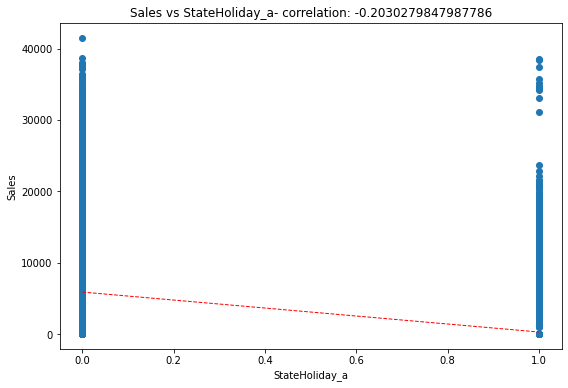

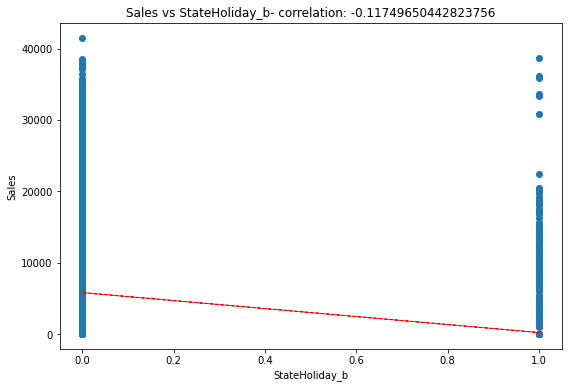

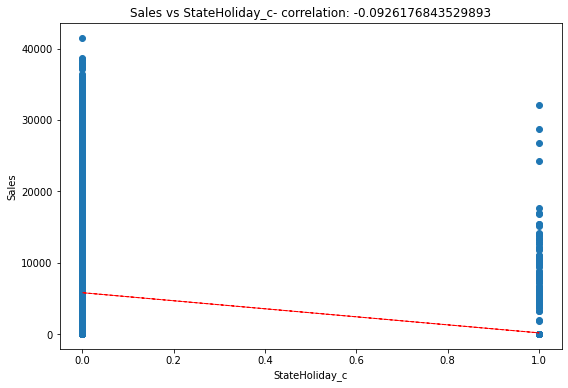

In [61]:
for col in numeric_features:
  if col not in ['Store','Date','Sales']:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = final_df[col]
    label = final_df['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(final_df[col], final_df['Sales'], 1)
    y_hat = np.poly1d(z)(final_df[col])

    plt.plot(final_df[col], y_hat, "r--", lw=1)

plt.show()

#In the above charts the Customer Feture has highly corelated to our target variable Sales.

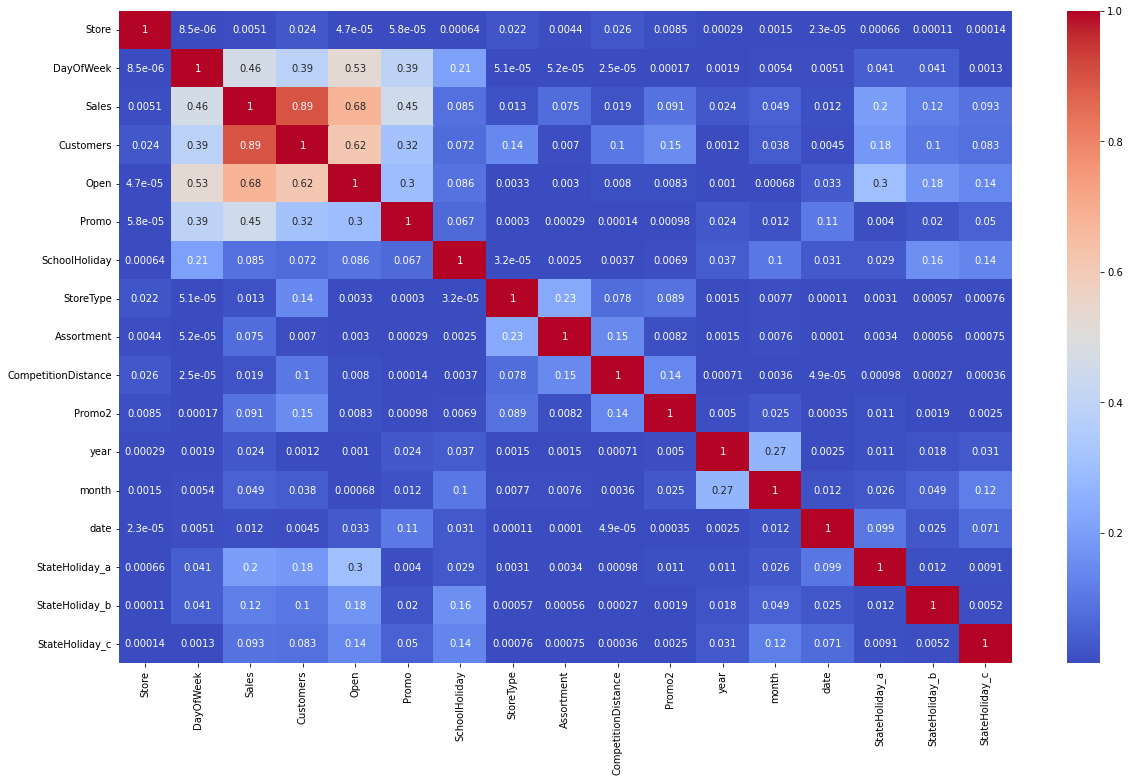

In [62]:
## Correlation heatmap
plt.figure(figsize=(20,12))
correlation = final_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

#Feature Selection.

#as we observ our dataset in which we have feature name called 'Open' which simply tells us weather a store open or closs. so sales only generated when store is open. So we have to eleminate those rows/ observation in which store is closs or its value = 0. then we have only data of store which is open. so we also drop that columns because all the observation values are same as '1'.

In [63]:
final_df[(final_df['Open'] == 0) & (final_df['Sales'] == 0)].count()[0]

172817

In [64]:
final_df = final_df.drop(final_df[(final_df['Open'] == 0) & (final_df['Sales'] == 0)].index)

In [65]:
final_df = final_df.copy()

In [66]:
#Multicollinearity

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [67]:
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ['Store','Sales','Open']]])

,variables,VIF
0,DayOfWeek,5.768711
1,Customers,5.395052
2,Promo,2.064591
3,SchoolHoliday,1.285619
4,StoreType,1.970762
5,Assortment,2.047143
6,CompetitionDistance,1.613343
7,Promo2,2.160861
8,year,23.792592
9,month,4.166033


#The Multicollinearity of 'year' is very high so we decided to drop these column for our linear Regression model.
#Because the the multicollinearity of each independeble feature should be under 10.

In [68]:
#Checking multicollinearity 
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ['Store','Sales','Open','year']]])

,variables,VIF
0,DayOfWeek,4.045907
1,Customers,4.107350
2,Promo,1.893498
3,SchoolHoliday,1.271504
4,StoreType,1.886218
5,Assortment,2.029049
6,CompetitionDistance,1.531443
7,Promo2,1.936858
8,month,3.682037
9,date,3.630245


In [69]:
final_df.shape

(844392, 18)

In [70]:
# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = final_df.columns.drop(['Store','Sales','Open','Date'])

#Creating the X,y values for our algorithm.

In [71]:
# Create the data of independent variables
X = final_df[indep_var].values

# Create the dependent variable data
y = final_df[dep_var].values

In [72]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(X_test.shape)

(675513, 14)
(168879, 14)


In [73]:
# Transforming data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Now Lets implement 3 models on our dataset:

1.   Linear Regression.
   *   Lasso
   *   Ridge
   *   Elastic Net
2.  Decision Tree
3.  Random Forrest
   *   Random Forrest with Optimization
4.  XGBoost
   *   XGBoost with Optimization.

#We will be using search algorithms/Optimization for each :

1.  GridSearchCV
3.  BayesianSearchCV

#We will be using following Matrics to check our model performance :
1.   Mean Absolute Error (MAE)
2.   Root Mean Square Error (MSE)
3.   Mean Square Error (MSE)
4.   R Squared (R2)
5.   Adjusted R Squared

#LINEAR REGRESSION

In [74]:
# Fitting Multiple Linear Regression to the Training set
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [75]:
# Predicting the Test set results
y_pred = reg.predict(X_test)
y_pred

array([11601.6963545 ,  5691.74639741,  7793.71795385, ...,
        7799.28608547,  9452.18674895,  4676.24508658])

#Checking the score on train set.

In [76]:
#check the score
reg.score(X_train, y_train)

0.762039400315583

In [77]:
#check the coefficeint
reg.coef_

array([-117.83228529, 2552.66064556,  639.15077229,   15.23846092,
        374.36010241,  196.58491592,  228.87305174,  120.56100692,
        136.38880346,  131.89147604,    9.59697235,  -54.79529177,
        -36.50586047,  -17.89862124])

In [78]:
#check the intercept
reg.intercept_

6956.3899155160525

In [79]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

#Checking the Performance on train set

In [80]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_train,y_pred_train)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2290313.6590443063
RMSE : 1513.3782273590123
MAE : 1046.6538161881242
R2 : 0.762039400315583
Adjusted R2 : 0.7620196717269225


#Looks like our r2 score value is 0.76 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [81]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

#Checking the Performance on test set

In [82]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 2303878.622550076
RMSE : 1517.8532941460699
MAE : 1048.2069969236313
R2 : 0.7620361137372791
Adjusted R2 : 0.7620163848761383


#The r2_score for the test set is 0.76. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [83]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

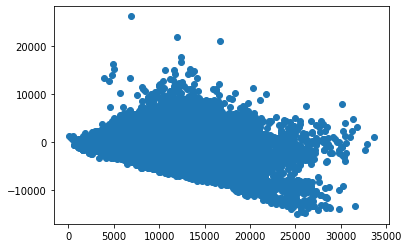

In [84]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

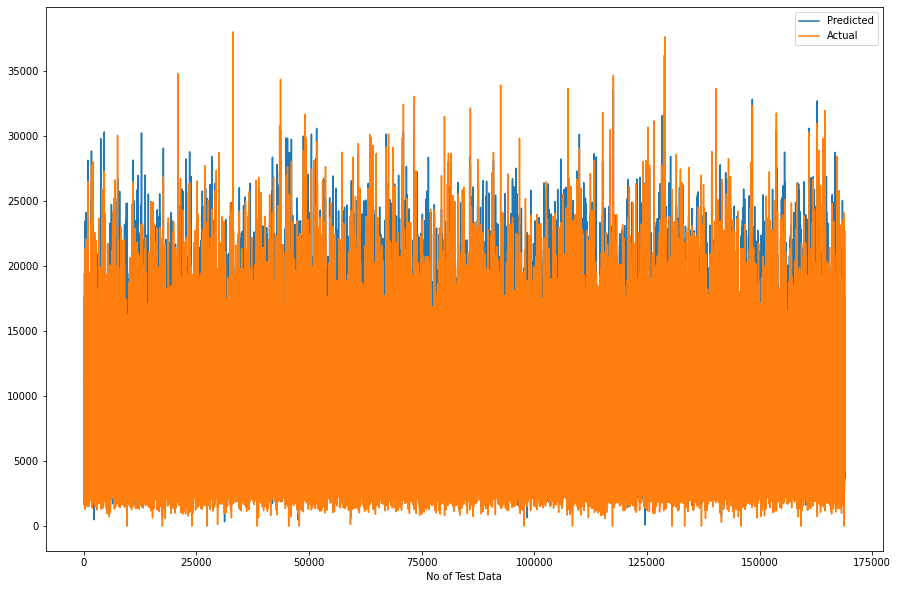

In [85]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

#Now doing Regularization with the help of Lasso(L1), Ridge(L2) and Elastic net.

#LASSO REGRESSION

In [86]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0001, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.7620361141442749 0.762039400315568


In [87]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

#Checking the Performance on train set

In [88]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2290313.6590444506
RMSE : 1513.37822735906
MAE : 1046.6538180233374
R2 : 0.762039400315568
Adjusted R2 : 0.7620196717269074


#Looks like our r2 score value is 0.76 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [89]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

#Checking the Performance on test set

In [90]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2303878.618609692
RMSE : 1517.853292848058
MAE : 1048.206998480002
R2 : 0.7620361141442749
Adjusted R2 : 0.7620163852831678


The r2_score for the test set is 0.76. This means our linear model performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [91]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

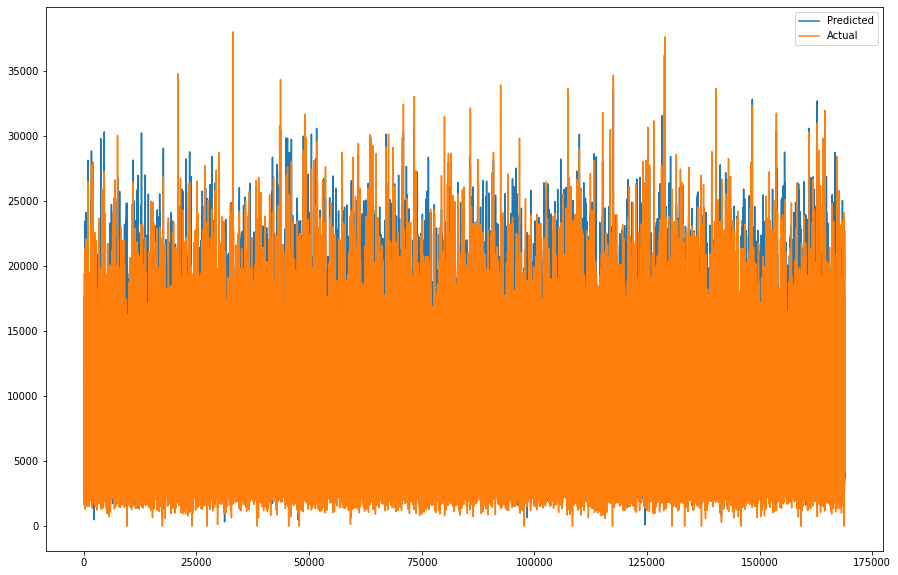

In [92]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

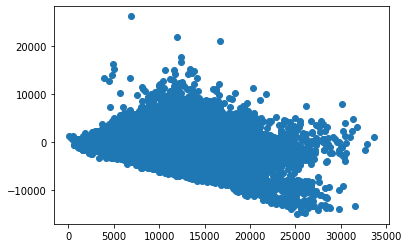

In [93]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

#LASSO REGRESSION WITH CROSS VALIDATION.

In [94]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-10,1e-5,1e-3,1e-1,1,5,10,30,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-10, 1e-05, 0.001, 0.1, 1, 5, 10, 30, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [95]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-10}

Using  {'alpha': 1e-10}  the negative mean squared error is:  -2290507.8013552185


In [96]:
#get the X_train and X-test value
y_pred_train_lasso=lasso_regressor.predict(X_train)
y_pred_test_lasso=lasso_regressor.predict(X_test)

#Checking the Performance on train set

In [97]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2290313.6590443077
RMSE : 1513.3782273590127
MAE : 1046.6538161881265
R2 : 0.7620394003155829
Adjusted R2 : 0.7620196717269223


In [98]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression with cross validation ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

#Checking the Performance on test set

In [99]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2303878.622550072
RMSE : 1517.8532941460687
MAE : 1048.2069969236331
R2 : 0.7620361137372794
Adjusted R2 : 0.7620163848761387


In [100]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression with cross validation ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

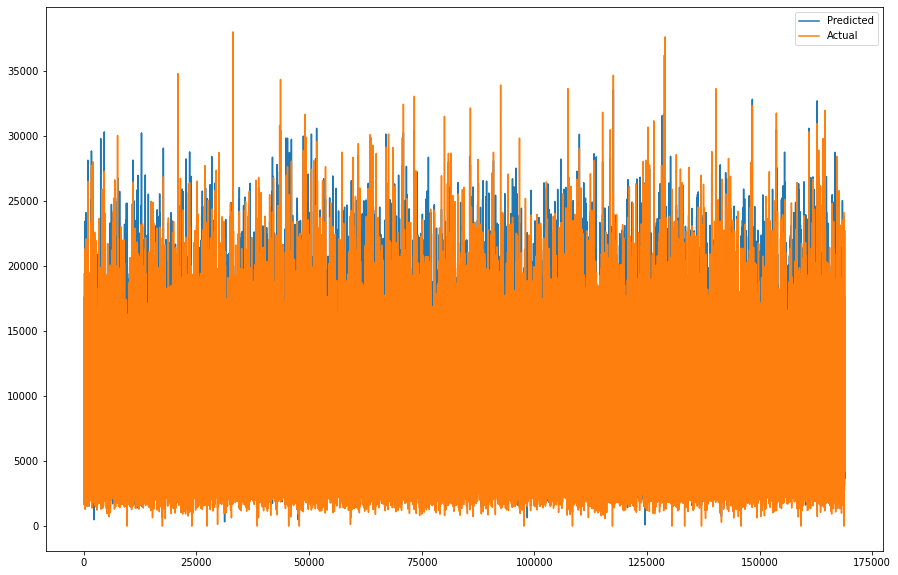

In [101]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

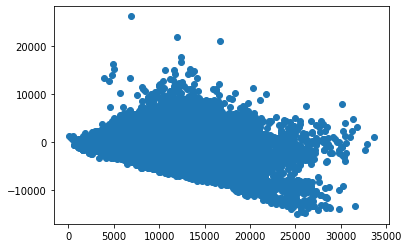

In [102]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

#RIDGE REGRESSION

In [103]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.01)

In [104]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.01)

In [105]:
#check the score
ridge.score(X_train, y_train)

0.7620394003155828

In [106]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

#Checking the Performance on train set

In [107]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2290313.659044308
RMSE : 1513.378227359013
MAE : 1046.653820455411
R2 : 0.7620394003155828
Adjusted R2 : 0.7620196717269223


In [108]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

#Checking the Performance score on test set

In [109]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2303878.622210121
RMSE : 1517.8532940340845
MAE : 1048.2070012022168
R2 : 0.7620361137723924
Adjusted R2 : 0.7620163849112546


In [110]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

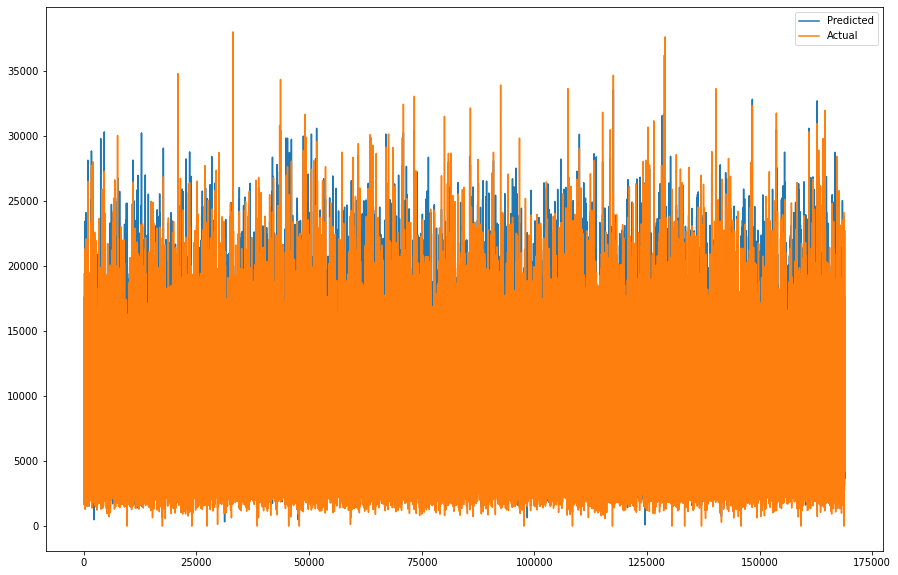

In [111]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

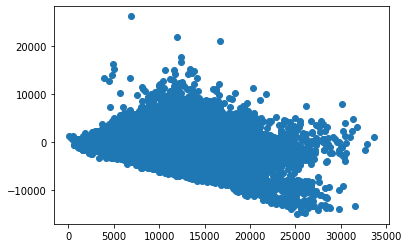

In [112]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

#RIDGE REGRESSOR WITH CROSS VALIDATION>

In [113]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-10,1e-5,1e-3,1e-1,1,5,10,30,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-10, 1e-05, 0.001, 0.1, 1, 5, 10, 30, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [114]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -2290507.793478004


In [115]:
#get the X_train and X-test value
y_pred_train_ridge=ridge_regressor.predict(X_train)
y_pred_test_ridge=ridge_regressor.predict(X_test)

#Checking the Performance on train set

In [116]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2290313.660863147
RMSE : 1513.3782279599332
MAE : 1046.6580837740999
R2 : 0.7620394001266079
Adjusted R2 : 0.7620196715379316


In [117]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression with cross validation',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

#Checking the Performance score on test set

In [118]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2303878.284432534
RMSE : 1517.8531827658874
MAE : 1048.2112759634217
R2 : 0.7620361486608915
Adjusted R2 : 0.7620164198026462


In [119]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression with cross validation',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

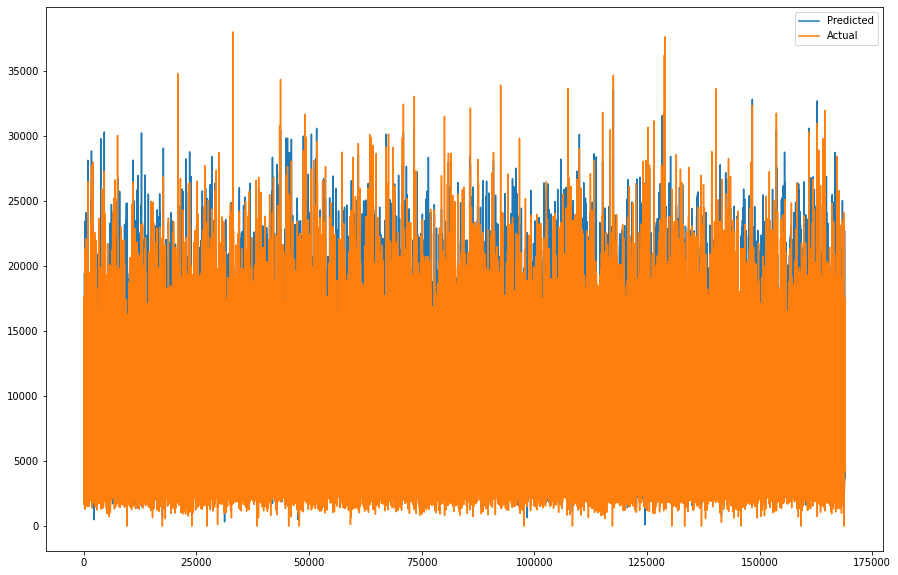

In [120]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

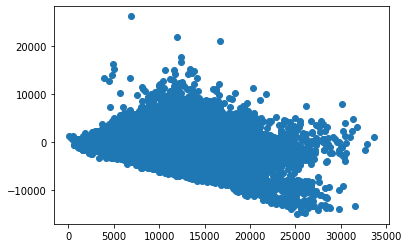

In [121]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

#ELASTIC NET REGRESSION

In [122]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [123]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [124]:
#check the score
elasticnet.score(X_train, y_train)

0.7601370536352839

In [125]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

#Checking the Performance on train set

In [126]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2308623.289260001
RMSE : 1519.4154432741564
MAE : 1064.500200276152
R2 : 0.7601370536352839
Adjusted R2 : 0.7601171673288534


In [127]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

#Checking the Performance on test set

In [128]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2321252.4192092237
RMSE : 1523.5656924495327
MAE : 1066.063612349276
R2 : 0.7602416024589145
Adjusted R2 : 0.7602217248203085


In [129]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

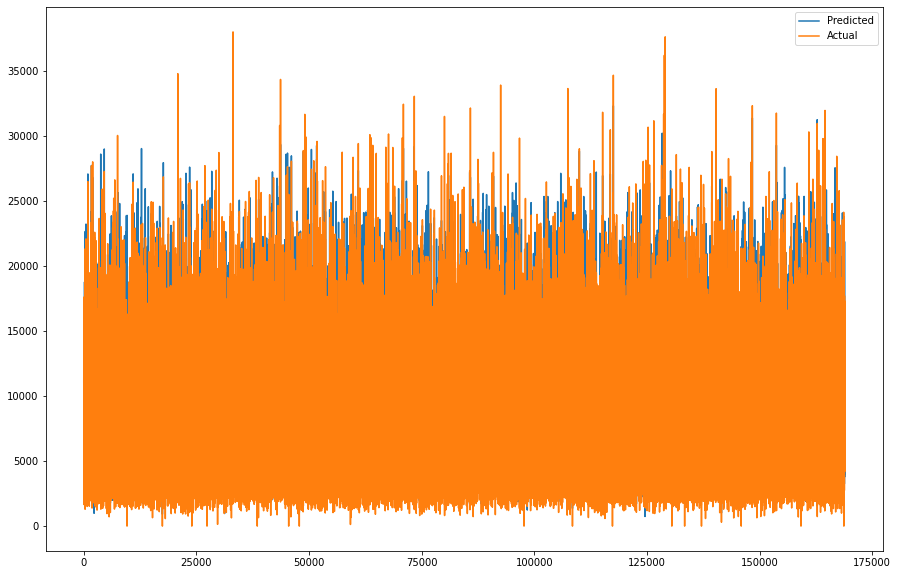

In [130]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

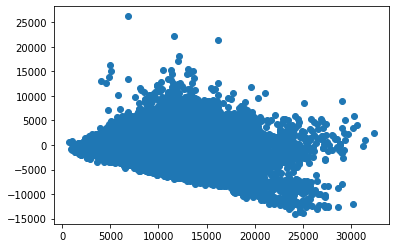

In [131]:
### Heteroscadacity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

#ELASTIC NET REGRESSOR WITH CROSS VALIDATION>

In [132]:
elastic = ElasticNet()
parameters = {'alpha': [1e-10,1e-5,1e-3,1e-1,1,5,10,30,60,100],'l1_ratio':[0.3,0.5,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=3)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-10, 1e-05, 0.001, 0.1, 1, 5, 10, 30, 60,
                                   100],
                         'l1_ratio': [0.3, 0.5, 0.8]},
             scoring='neg_mean_squared_error')

In [133]:
#get the X_train and X-test value
y_pred_train_en=elastic_regressor.predict(X_train)
y_pred_test_en=elastic_regressor.predict(X_test)

#Checking the Performance on train set

In [134]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2290313.659451237
RMSE : 1513.3782274934567
MAE : 1046.655834196777
R2 : 0.7620394002733035
Adjusted R2 : 0.7620196716846395


In [135]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression with cross validation ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

#Checking the Performance on test set

In [136]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2303878.462091806
RMSE : 1517.8532412890931
MAE : 1048.20902027496
R2 : 0.7620361303107535
Adjusted R2 : 0.7620164014509867


In [137]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression cross validation',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

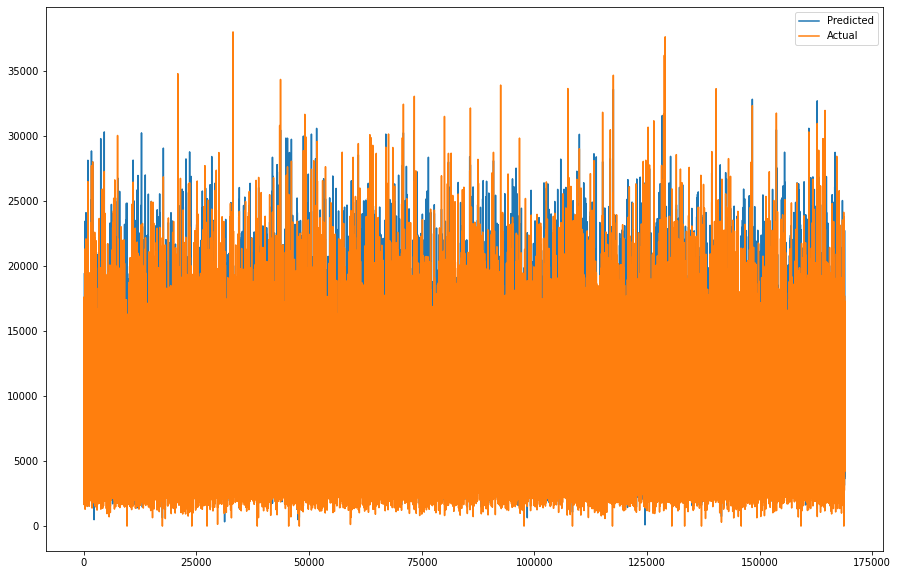

In [138]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

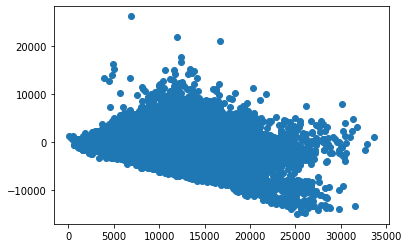

In [139]:
### Heteroscadacity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

#DECISION TREE

#Now we will use Desision tree algorithm.
#Which doesn't care whether the multicolinearity is high or low. So we gonna use all the feature which we have in our dataset.

In [140]:
# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = final_df.columns.drop(['Store','Date','Open','Sales'])

In [141]:
indep_var

Index(['DayOfWeek', 'Customers', 'Promo', 'SchoolHoliday', 'StoreType',
       'Assortment', 'CompetitionDistance', 'Promo2', 'year', 'month', 'date',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c'],
      dtype='object')

In [142]:
# Create the data of independent variables
X = final_df[indep_var]

# Create the dependent variable data
y = final_df[dep_var]

In [143]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(X_test.shape)

(675513, 14)
(168879, 14)


In [144]:
X_train_with_coumns = X_train

In [145]:
# Transforming data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [146]:
#import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=10, max_leaf_nodes=100,random_state=1)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=10,
                      max_leaf_nodes=100, random_state=1)

In [147]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

#Checking the Performance on train set

In [148]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.8363083104791128
MSE : 1575493.2239997995
RMSE : 1255.186529564351
MAE : 918.9777900031484
R2 : 0.8363083104791128
Adjusted R2 : 0.8362947392996234


#**Looks like our r2 score value is 0.83 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [149]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Decision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

#Checking the Performance on test set

In [150]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 1578122.8474717445
RMSE : 1256.2335959015522
MAE : 917.903259759479
R2 : 0.8369982506419107
Adjusted R2 : 0.8369847366632592


In [151]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Decision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

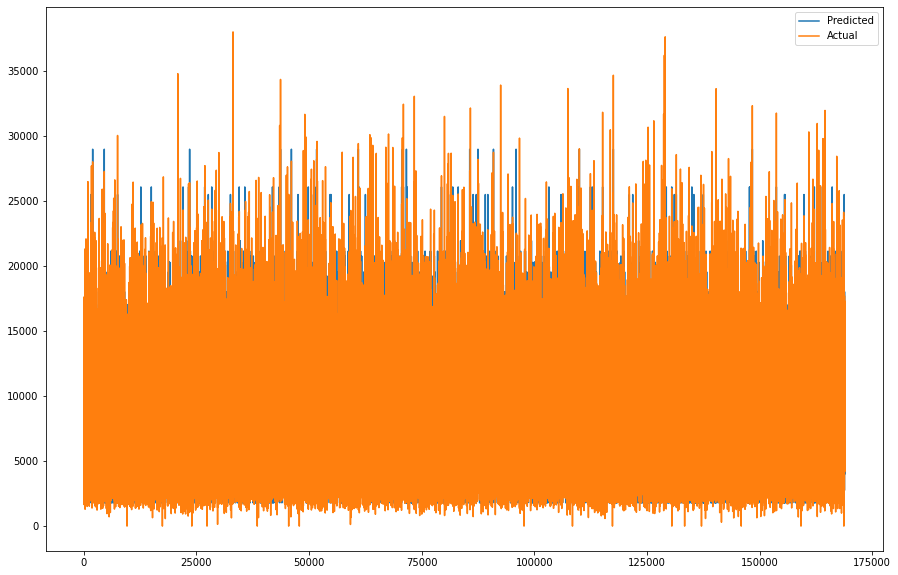

In [152]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

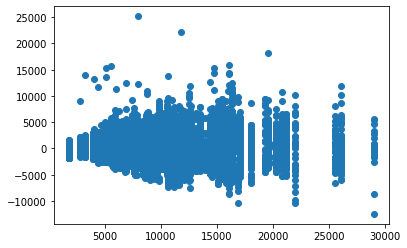

In [153]:
### Heteroscadacity
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))

# **RANDOM FOREST**

In [154]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=50, criterion='squared_error',random_state=1)

rf_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50, random_state=1)

In [155]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)


#Checking the Performance on train set

In [156]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9951481804463228
MSE : 46697.59871903995
RMSE : 216.09627187677242
MAE : 140.08335565879983
R2 : 0.9951481804463228
Adjusted R2 : 0.9951477781967388


In [158]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

#Checking the Performance on test set

In [162]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 316111.53702629614
RMSE : 562.2379718822771
MAE : 368.5790871744182
R2 : 0.9673493520418199
Adjusted R2 : 0.9673466450760284


In [163]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

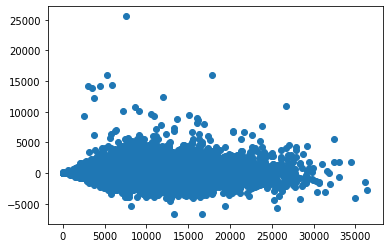

In [164]:
### Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))

#Getting the features which are important for our random forest model.

In [165]:
rf_model.feature_importances_

array([1.27533627e-02, 7.40892033e-01, 3.46537283e-02, 1.23572881e-03,
       6.09710798e-02, 1.39377088e-02, 1.03687717e-01, 9.02932686e-03,
       3.90015640e-03, 9.10593259e-03, 9.59529037e-03, 1.57569333e-04,
       5.21848156e-05, 2.81813089e-05])

In [166]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train_with_coumns.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [167]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [168]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,Customers,0.74
6,CompetitionDistance,0.10
4,StoreType,0.06
2,Promo,0.03
0,DayOfWeek,0.01
5,Assortment,0.01
7,Promo2,0.01
9,month,0.01
10,date,0.01
3,SchoolHoliday,0.00


In [169]:
features = X_train_with_coumns.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

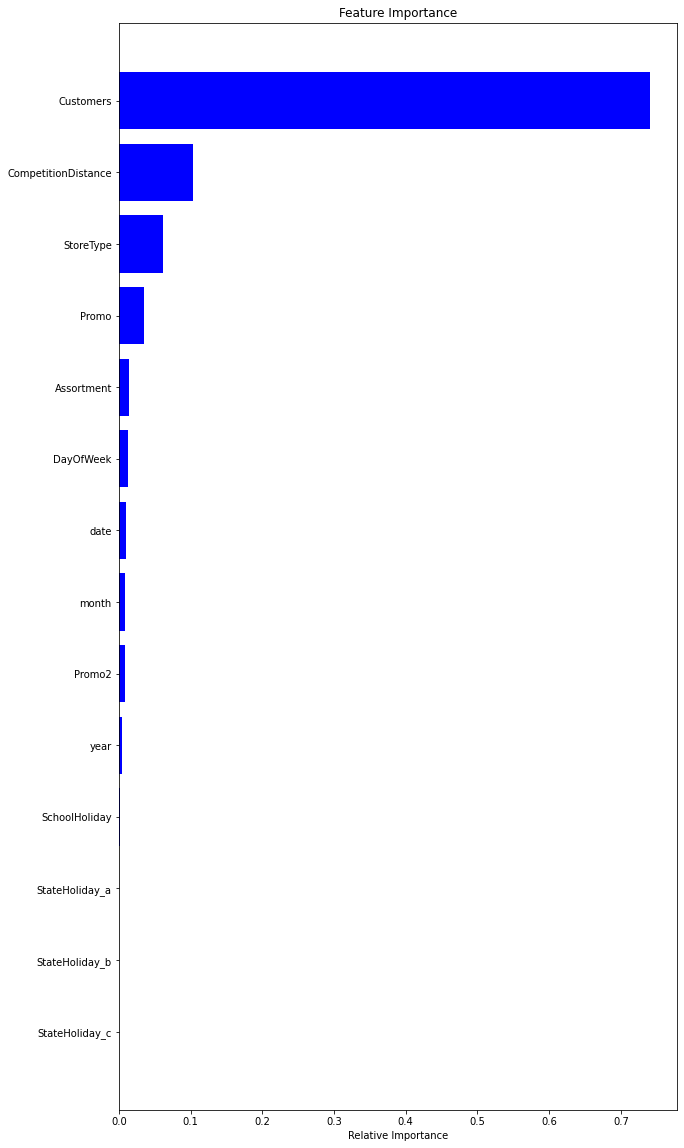

In [170]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#From the above chart we acn see that Costumers, CompetitionDistance, StoreType and Promo are the main important feature for our algorithm/model.

#XGBoost

In [171]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=50, criterion='squared_error',random_state=1)

xgb.fit(X_train,y_train)

[17:22:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(criterion='squared_error', n_estimators=50, random_state=1)

In [172]:
# Making predictions on train and test data

y_pred_train_r = xgb.predict(X_train)
y_pred_test_r = xgb.predict(X_test)


#Checking the Performance on train set

In [173]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",xgb.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.8559304261762124
MSE : 1386635.0699187652
RMSE : 1177.5546993319526
MAE : 848.0683286469427
R2 : 0.8559304261762124
Adjusted R2 : 0.8559184818065805


In [174]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'XGBRegressor ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

#Checking the Performance on test set

In [175]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 1394660.3850771994
RMSE : 1180.9574018893313
MAE : 848.0143741217362
R2 : 0.8559477908248962
Adjusted R2 : 0.8559358478949144


In [176]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'XGBRegressor ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

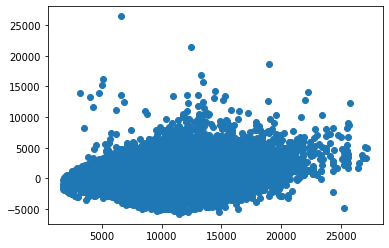

In [177]:
### Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))

#Getting the features which are important for our random forest model.

In [178]:
xgb.feature_importances_

array([0.05245017, 0.45636097, 0.14336056, 0.        , 0.10668734,
       0.06320752, 0.05674544, 0.02269074, 0.02790131, 0.0476756 ,
       0.0229204 , 0.        , 0.        , 0.        ], dtype=float32)

In [179]:
importances = xgb.feature_importances_

importance_dict = {'Feature' : list(X_train_with_coumns.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [180]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [181]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,Customers,0.46
2,Promo,0.14
4,StoreType,0.11
5,Assortment,0.06
6,CompetitionDistance,0.06
0,DayOfWeek,0.05
9,month,0.05
8,year,0.03
7,Promo2,0.02
10,date,0.02


In [182]:
features = X_train_with_coumns.columns
importances = xgb.feature_importances_
indices = np.argsort(importances)

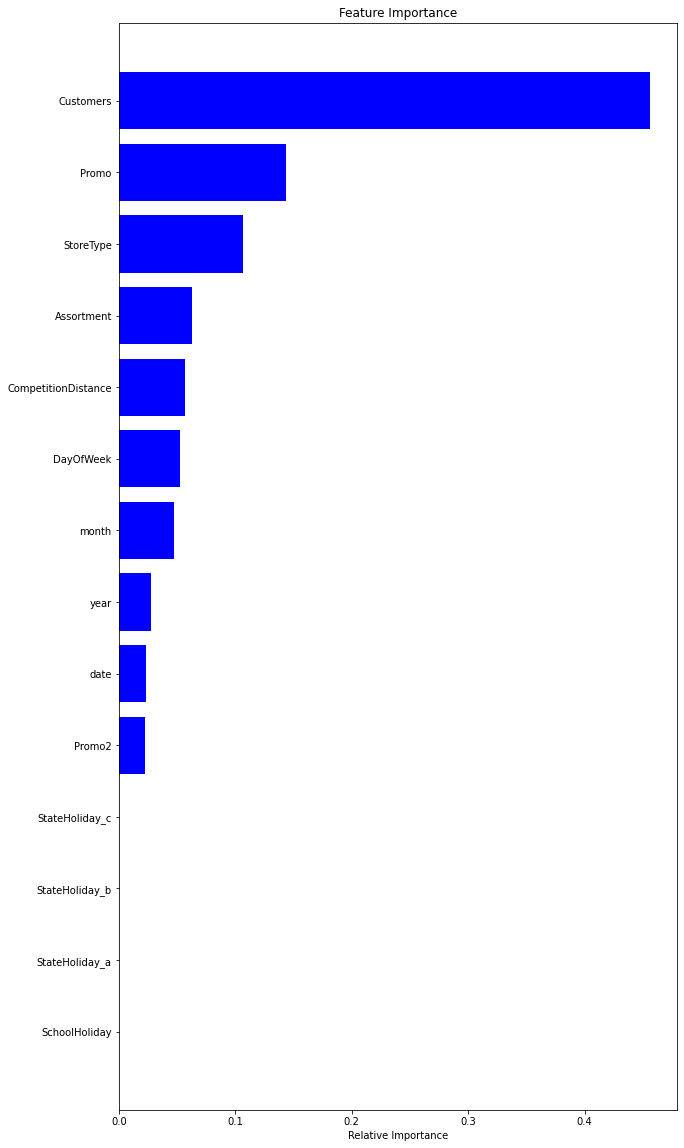

In [183]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **GRADIENT BOOSTING**

In [185]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=1)


gb_model.fit(X_train,y_train)

GradientBoostingRegressor(random_state=1)

In [186]:
# Making predictions on train and test data

y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)


In [187]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))
#calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.8801676777899784
MSE : 1153357.3403184852
RMSE : 1073.9447566418326
MAE : 785.2274323658855
R2 : 0.8801676777899784
Adjusted R2 : 0.8801577428570683


**Looks like our r2 score value is 0.88 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [188]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [189]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 1160237.302965504
RMSE : 1077.1431209293887
MAE : 784.9111468077153
R2 : 0.8801609707654431
Adjusted R2 : 0.880151035276474


**The r2_score for the test set is 0.88. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**




In [190]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

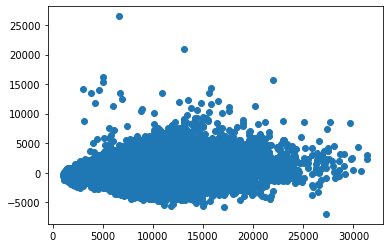

In [191]:
### Heteroscadacity
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g))

In [192]:
gb_model.feature_importances_

array([0.00944503, 0.82277614, 0.04588715, 0.        , 0.05378571,
       0.02218624, 0.02980999, 0.00504062, 0.00162504, 0.00593403,
       0.00351005, 0.        , 0.        , 0.        ])

In [193]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train_with_coumns.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [194]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [195]:
importance_df.head()

,Feature,Feature Importance
0,DayOfWeek,0.01
1,Customers,0.82
2,Promo,0.05
3,SchoolHoliday,0.00
4,StoreType,0.05


In [196]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,Customers,0.82
2,Promo,0.05
4,StoreType,0.05
6,CompetitionDistance,0.03
5,Assortment,0.02
0,DayOfWeek,0.01
7,Promo2,0.01
9,month,0.01
3,SchoolHoliday,0.00
8,year,0.00


In [197]:
features = X_train_with_coumns.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

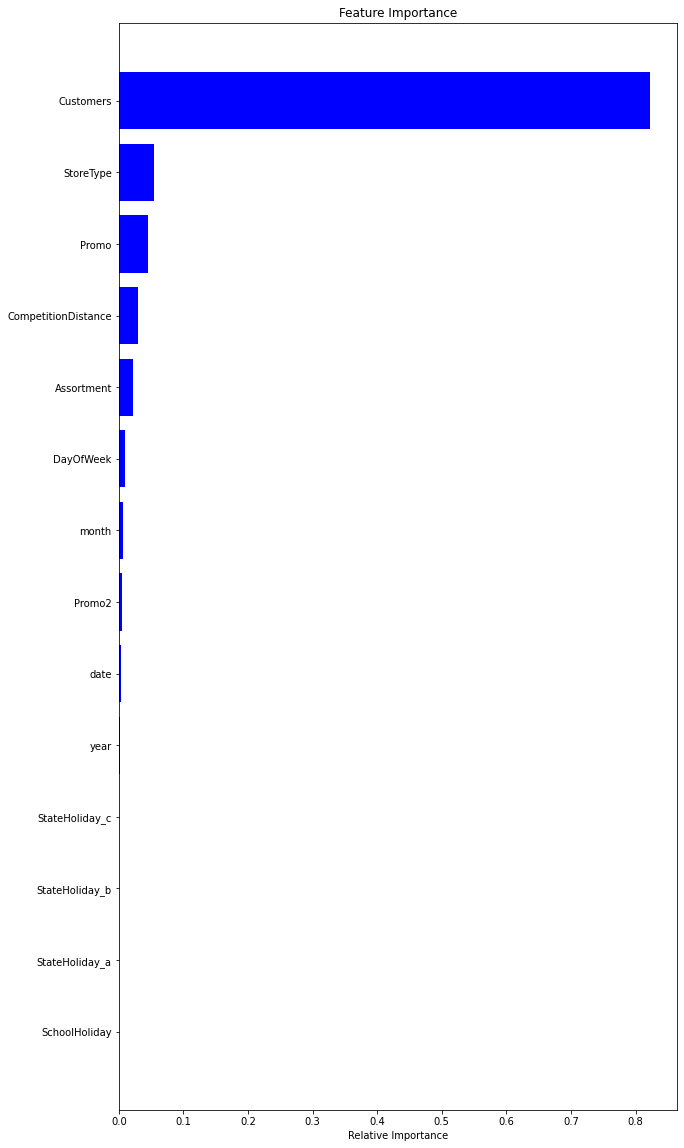

In [198]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

##**Gradient Boosting Regressor with GridSearchCV**

### **Provide the range of values for chosen hyperparameters**

In [199]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [200]:
param_dict

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 2, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 2 folds for each of 54 candidates, totalling 108 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=  26.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=  26.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=  41.5s


#Getting the best Estimator.

In [ ]:
#geting the best estimator
gb_grid.best_estimator_

#Getting the optimal Model.

In [ ]:
#geting the optimal model
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
#getting best parameters.
gb_grid.best_params_

In [ ]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_g_g),(y_test)-(y_pred_g_g))

In [ ]:
gb_optimal_model.feature_importances_

In [ ]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train_with_coumns.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.head()

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

In [ ]:
features = X_train_with_coumns.columns
importances = gb_optimal_model.feature_importances_
indices = np.argsort(importances)

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result